## COLUMNS DESCRIPTION

In [1]:
import pandas as pd 
columns_description= pd.read_csv('columns_description.csv')
pd.set_option('display.max_rows', None)
display(columns_description)

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN


## Uploading application_data & previous application

In [2]:
application_data = pd.read_csv('application_data.csv')
previous_application = pd.read_csv('previous_application.csv')

###  shape of datasets

In [3]:
print('The shape of application_data is {}'.format(application_data.shape))
print('The shape of previous application is {}'.format(previous_application.shape))

The shape of application_data is (307511, 122)
The shape of previous application is (1670214, 37)


# Data preprocessing

### I. application_data analysis

In [4]:
display(application_data.head(5))

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


check if the dataset contains Nan values

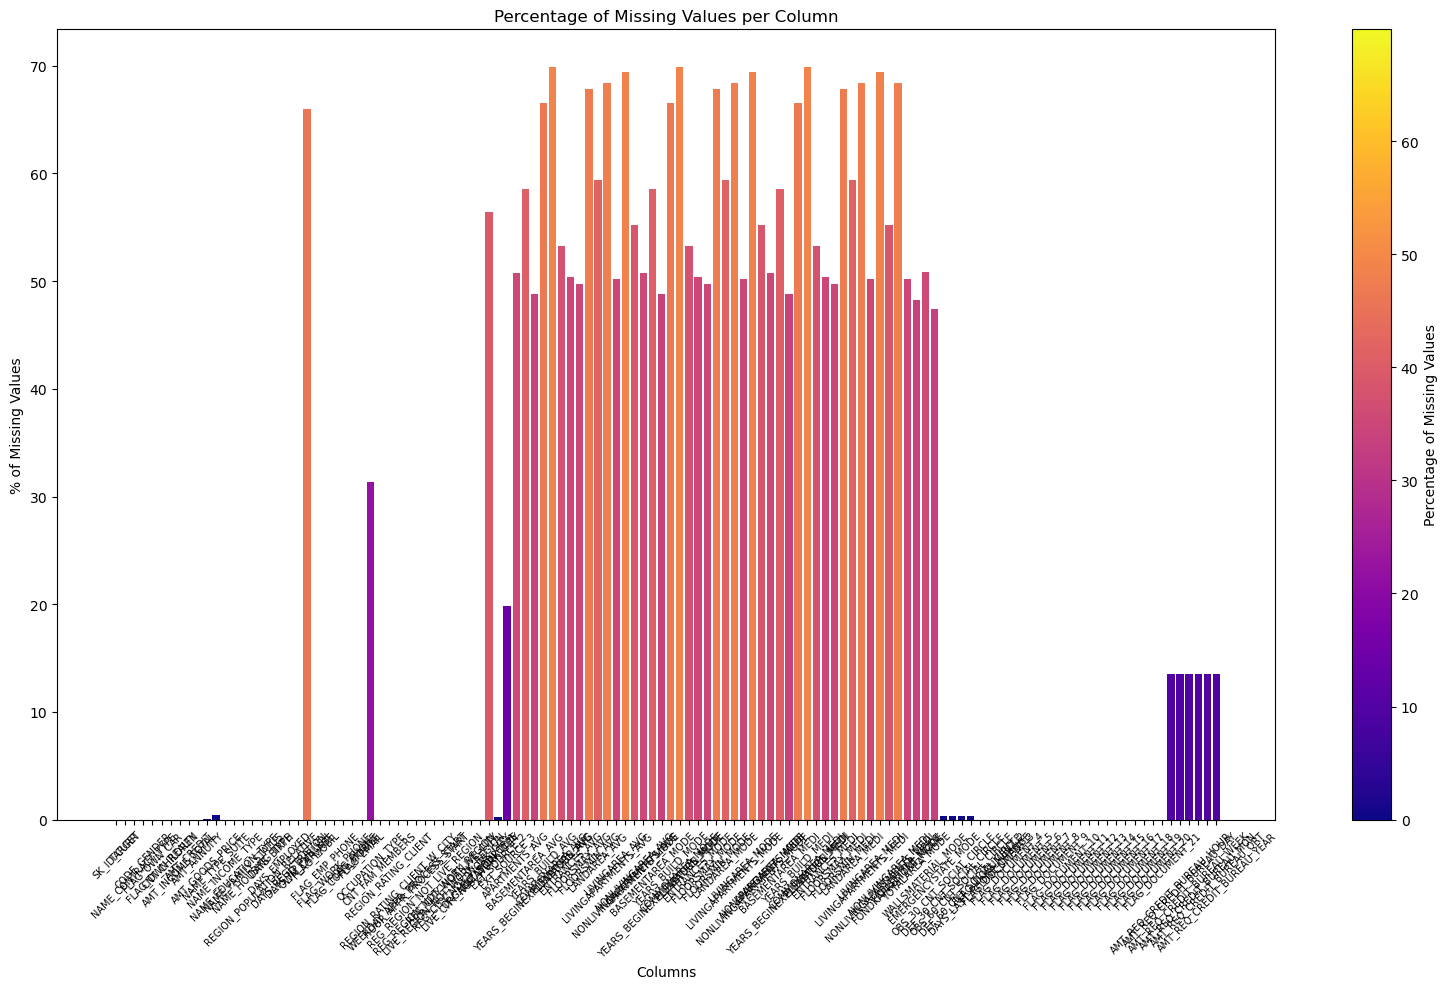

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Calculate the percentage of missing values per column
missing_percentage = (application_data.isnull().sum() / len(application_data)) * 100

colormap = 'plasma'

# Create a figure and axes
fig, ax = plt.subplots(figsize=(16, 10))

# Create a bar chart to display the percentage of missing values
bars = ax.bar(missing_percentage.index, missing_percentage.values, color=plt.get_cmap(colormap)(missing_percentage.values / 100))
ax.set_xlabel('Columns')
ax.set_ylabel('% of Missing Values')
ax.set_title('Percentage of Missing Values per Column')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, fontsize=7)

# Add a color bar to indicate the correspondence between color and percentage
sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=missing_percentage.min(), vmax=missing_percentage.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical')
cbar.set_label('Percentage of Missing Values')

plt.tight_layout()
plt.show()


Removing columns with over 40% of missing values.

In [6]:
# calculating the pourcentage of missing values in each column
missing_values = 100*(application_data.isnull().sum()/len(application_data.index))

#creating empty lists to store in the columns to keep or drop
Keep_columns = []
drop_columns = []

#iterate over the index and values of missing_values to see if column has missing values more than 40%
for i, j in zip(missing_values.index, missing_values.values):
    if j > 40 :
        drop_columns.append(i)
    else:
        Keep_columns.append(i)
        
        

print('columns to drop : {}'.format(drop_columns))
print()
print(len(drop_columns))

columns to drop : ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'E

In [7]:
# Drop columns with over 40% of missing values  
application_data = application_data.drop(drop_columns, axis=1)

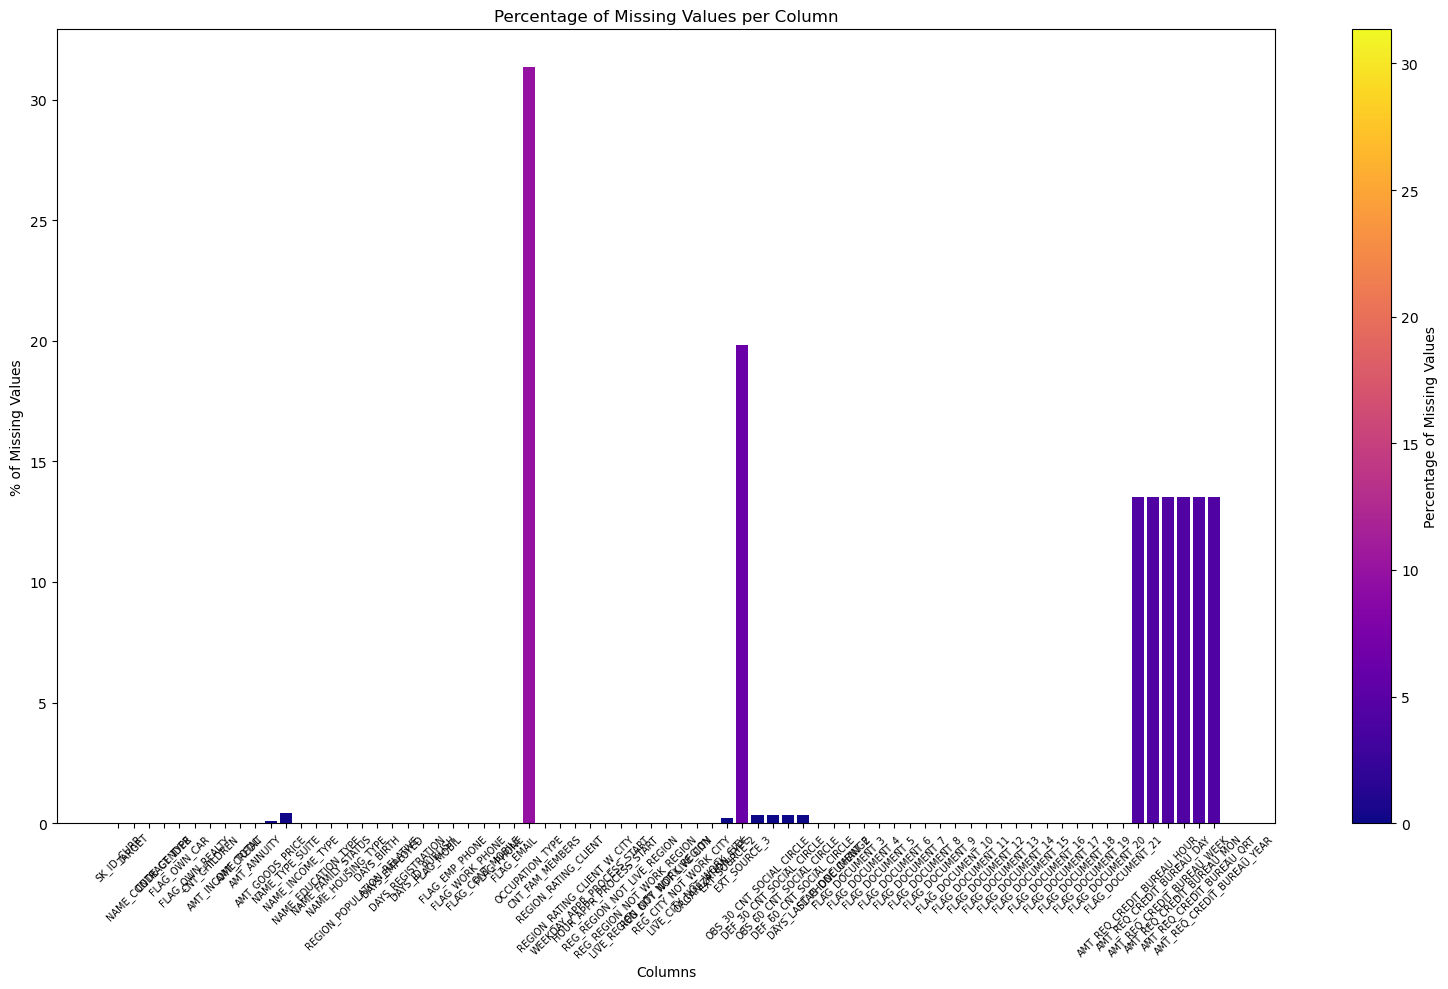

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Calculate the percentage of missing values per column
missing_percentage = (application_data.isnull().sum() / len(application_data)) * 100

colormap = 'plasma'

# Create a figure and axes
fig, ax = plt.subplots(figsize=(16, 10))

# Create a bar chart to display the percentage of missing values
bars = ax.bar(missing_percentage.index, missing_percentage.values, color=plt.get_cmap(colormap)(missing_percentage.values / 100))
ax.set_xlabel('Columns')
ax.set_ylabel('% of Missing Values')
ax.set_title('Percentage of Missing Values per Column')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, fontsize=7)

# Add a color bar to indicate the correspondence between color and percentage
sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=missing_percentage.min(), vmax=missing_percentage.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical')
cbar.set_label('Percentage of Missing Values')

plt.tight_layout()
plt.show()


In [9]:
application_data.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


 Filling missing values with suggestions

In [10]:
type(missing_values)

pandas.core.series.Series

In [11]:
# Select elements (columns) from missing_values that are in Keep_columns
selected_missing_values = missing_values[missing_values.index.isin(Keep_columns)]
selected_missing_values

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

select columns to fill

In [12]:
columns_to_fill = []
for i, j in zip(selected_missing_values.index, selected_missing_values.values):
    if j != 0 :
        columns_to_fill.append(i)
print('columns to fill : {}'.format(columns_to_fill))
        

columns to fill : ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


In [13]:
application_data[columns_to_fill].isnull().sum()

AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
OCCUPATION_TYPE               96391
CNT_FAM_MEMBERS                   2
EXT_SOURCE_2                    660
EXT_SOURCE_3                  60965
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
DAYS_LAST_PHONE_CHANGE            1
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64

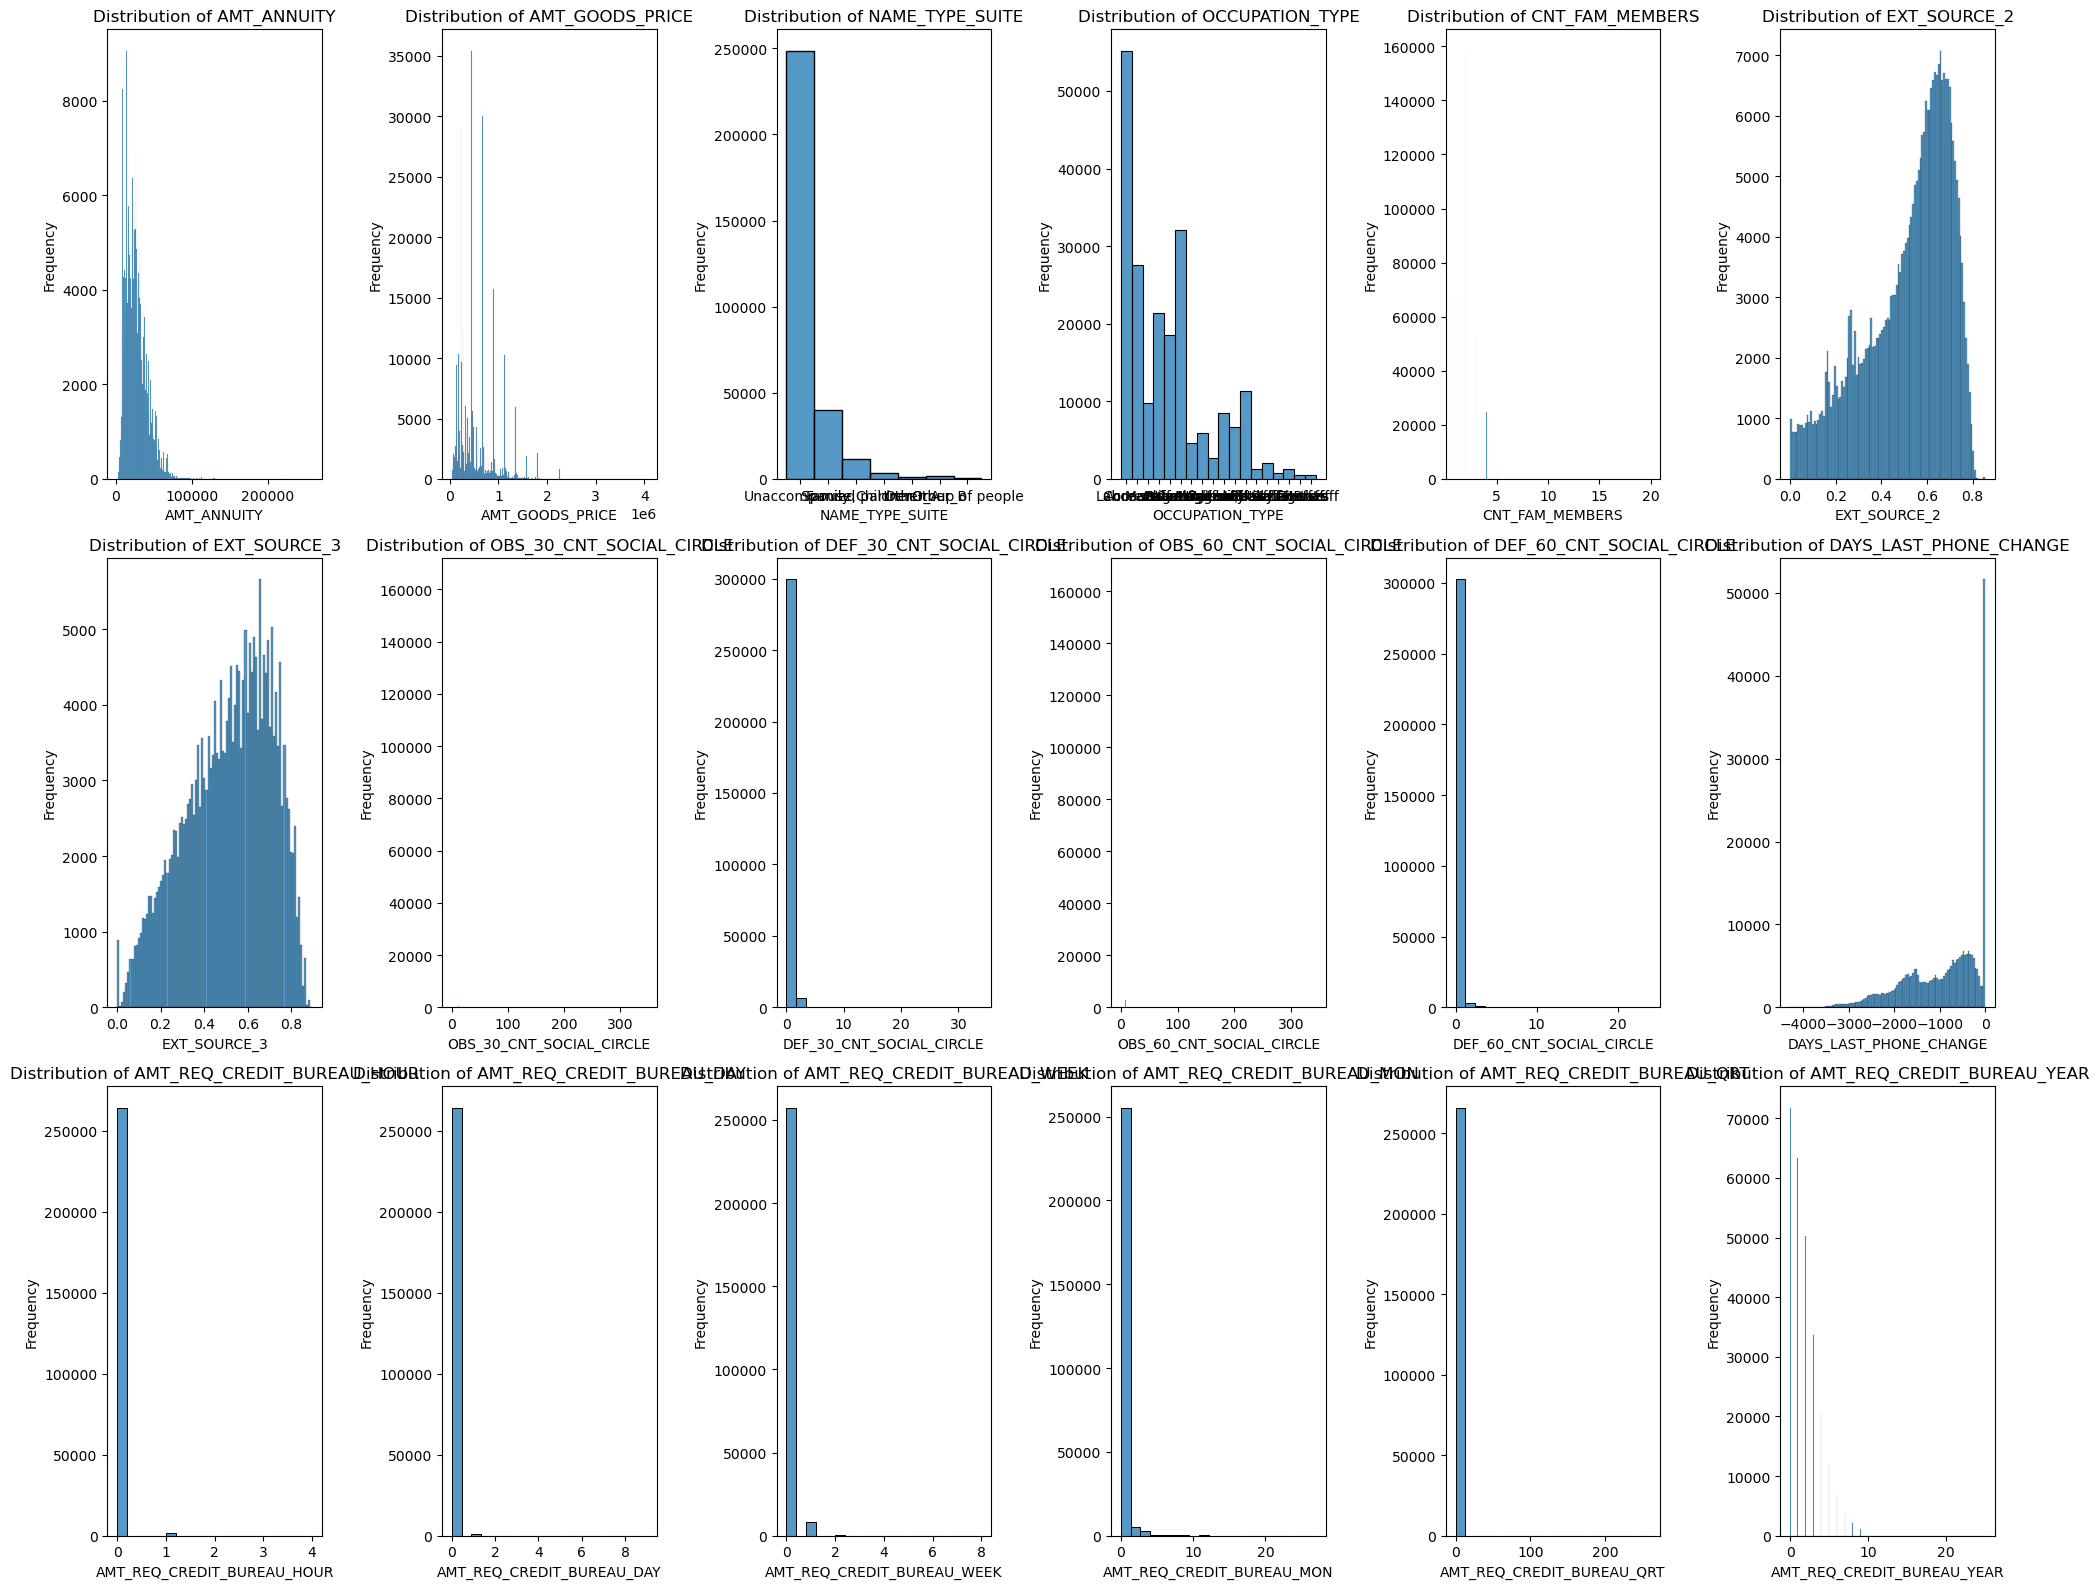

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the number of rows and columns for the subplot grid
n_cols = 6  # Number of columns in the grid
n_rows = (len(columns_to_fill) + n_cols - 1) // n_cols  # Calculate the number of rows

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 16))


# Iterate over the column names and create histograms
for i, column_name in enumerate(columns_to_fill):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]

    sns.histplot(x=column_name, data=application_data, ax=ax)
    ax.set_xlabel(column_name)
    ax.set_ylabel('Frequency')
    ax.set_title('Distribution of {}'.format(column_name))

# Remove any empty subplots
for i in range(len(columns_to_fill), n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


for numerical data if the distribution is skewed, missing values will be replaced by the median, if its normalized they will be replaced by the mean

For categorical data,missing values will be filled with the top
### 

In [15]:
numerical_columns = application_data.select_dtypes(include=['number'])  # Select numeric columns
categorical_columns = application_data.select_dtypes(exclude=['number'])  # Select non-numeric columns

analyse the destribution of each column in the dataset 

store mean and median or top (most frequent category) for each column in lists

In [16]:
median=[]
mean=[]
top=[]
for column_name in columns_to_fill:
    # Check if the column is numerical
    s = application_data[column_name].describe()

    if application_data[column_name].dtype in ['int64', 'float64']:
        median.append((column_name,s['50%']))
        mean.append((column_name,s['mean']))
    else:
        top.append((column_name,s['top']))  
        
    print('Description of {}'.format(column_name))
    print(s)
    print()



Description of AMT_ANNUITY
count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

Description of AMT_GOODS_PRICE
count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

Description of NAME_TYPE_SUITE
count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

Description of OCCUPATION_TYPE
count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

Description of CNT_FAM_MEMBERS
count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max   

### Filling missing values

In [17]:
normaly_distributed=['EXT_SOURCE_2','EXT_SOURCE_3']
for i in range(len(mean)): #mean or median same
    if mean[i][0] not in normaly_distributed: #only fill skewed columns with median
        application_data[median[i][0]].fillna(median[i][1], inplace= True)
    else:
        application_data[mean[i][0]].fillna(mean[i][1], inplace= True)

for i in range(len(top)):
    application_data[top[i][0]].fillna(top[i][1], inplace= True)



In [18]:
application_data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

### II. Previous data analysis

check if the dataset contains Nan values

In [19]:
previous_application.head(3)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0


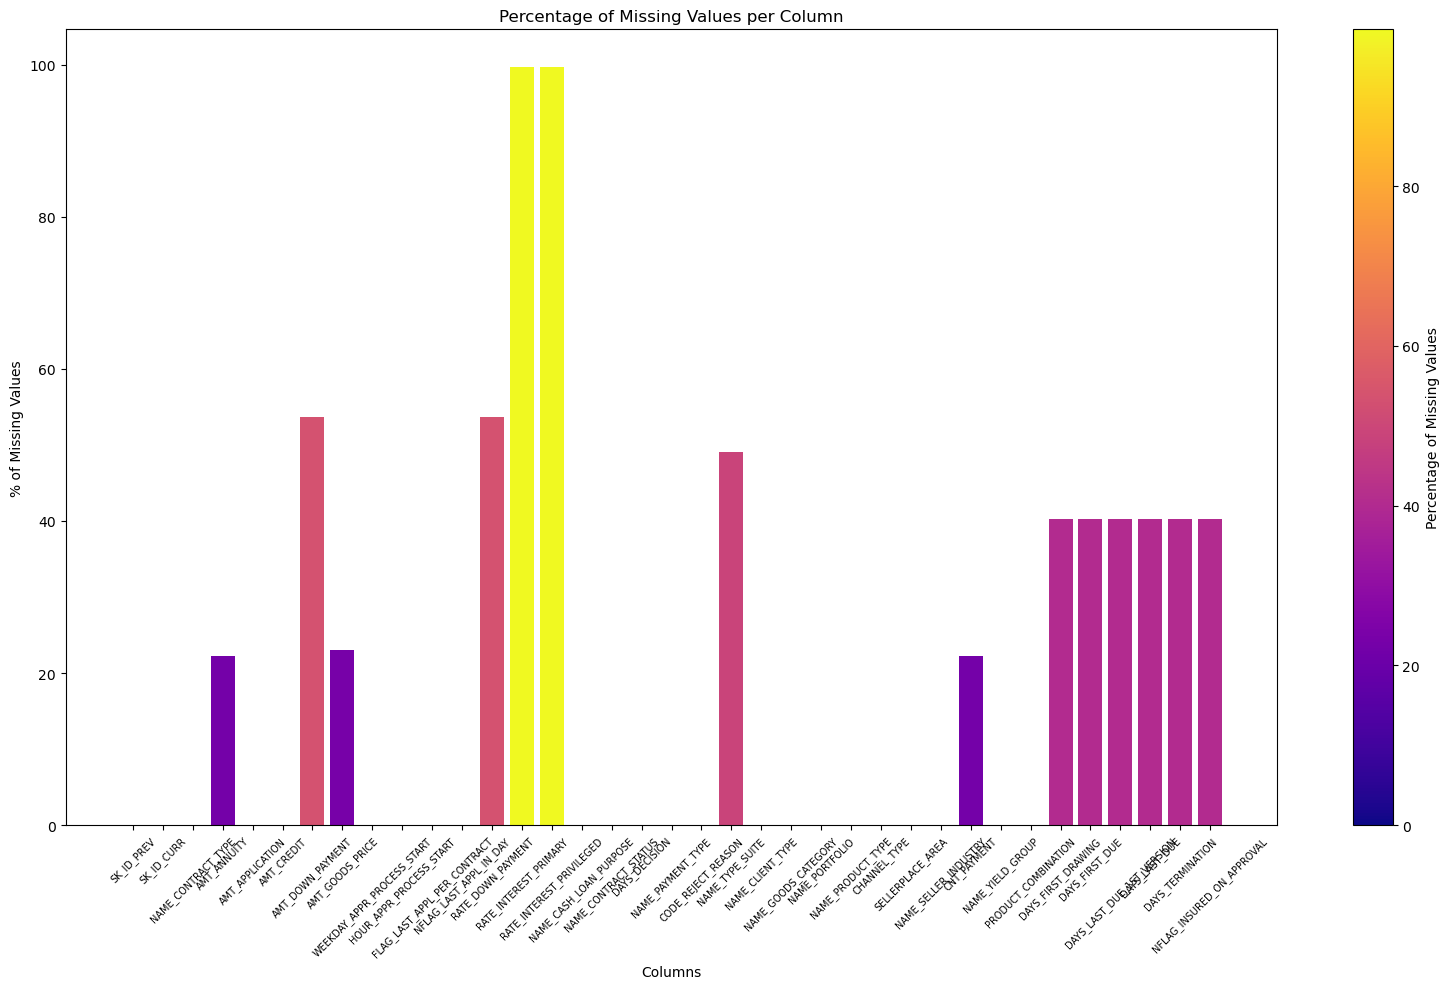

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Calculate the percentage of missing values per column
missing_percentage = (previous_application.isnull().sum() / len(previous_application)) * 100

colormap = 'plasma'

# Create a figure and axes
fig, ax = plt.subplots(figsize=(16, 10))

# Create a bar chart to display the percentage of missing values
bars = ax.bar(missing_percentage.index, missing_percentage.values, color=plt.get_cmap(colormap)(missing_percentage.values / 100))
ax.set_xlabel('Columns')
ax.set_ylabel('% of Missing Values')
ax.set_title('Percentage of Missing Values per Column')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, fontsize=7)

# Add a color bar to indicate the correspondence between color and percentage
sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=missing_percentage.min(), vmax=missing_percentage.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical')
cbar.set_label('Percentage of Missing Values')

plt.tight_layout()
plt.show()


Removing columns with over 40% of missing values.

In [21]:
# calculating the pourcentage of missing values in each column
missing_values = 100*(previous_application.isnull().sum()/len(previous_application.index))

#creating empty lists to store in the columns to keep or drop
Keep_columns = []
drop_columns = []

#iterate over the index and values of missing_values to see if column has missing values more than 50%
for i, j in zip(missing_values.index, missing_values.values):
    if j > 40 :
        drop_columns.append(i)
    else:
        Keep_columns.append(i)
        
        

print('columns to drop : {}'.format(drop_columns))

columns to drop : ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


In [22]:
# applicants who got their previous loan canceled have NAN values in these columns, we can replace NAN with 0
# instead of dropping the column
days_data = {'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION'}

drop_columns = [item for item in drop_columns if item not in days_data]
#Keep_columns = Keep_columns.append(days_data) we can manually fill missing data

In [23]:
# Drop columns with over 40% of missing values  
previous_application=previous_application.drop(drop_columns, axis=1)

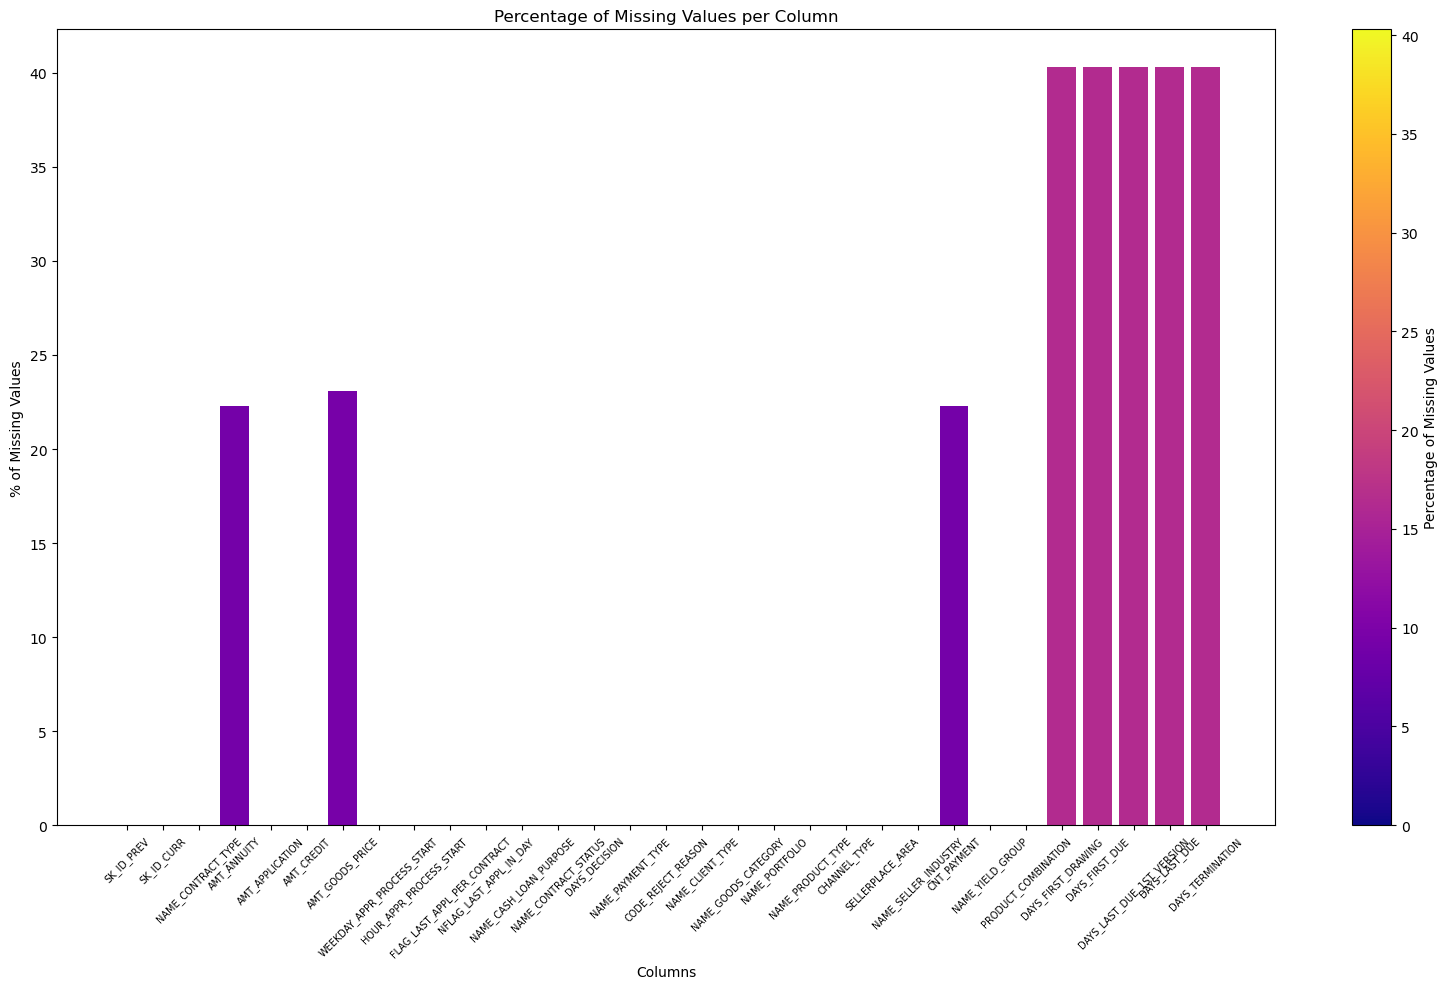

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Calculate the percentage of missing values per column
missing_percentage = (previous_application.isnull().sum() / len(previous_application)) * 100

colormap = 'plasma'

# Create a figure and axes
fig, ax = plt.subplots(figsize=(16, 10))

# Create a bar chart to display the percentage of missing values
bars = ax.bar(missing_percentage.index, missing_percentage.values, color=plt.get_cmap(colormap)(missing_percentage.values / 100))
ax.set_xlabel('Columns')
ax.set_ylabel('% of Missing Values')
ax.set_title('Percentage of Missing Values per Column')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, fontsize=7)

# Add a color bar to indicate the correspondence between color and percentage
sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=missing_percentage.min(), vmax=missing_percentage.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical')
cbar.set_label('Percentage of Missing Values')

plt.tight_layout()
plt.show()


In [25]:
# Select elements (columns) from missing_values that are in Keep_columns
selected_missing_values = missing_values[missing_values.index.isin(Keep_columns)]
selected_missing_values

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

select the columns to fill

In [26]:
columns_to_fill = []
for i, j in zip(selected_missing_values.index, selected_missing_values.values):
    if j != 0 :
        columns_to_fill.append(i)
print(columns_to_fill)
        

['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_PAYMENT', 'PRODUCT_COMBINATION']


In [27]:
previous_application[columns_to_fill].isnull().sum()

AMT_ANNUITY            372235
AMT_CREDIT                  1
AMT_GOODS_PRICE        385515
CNT_PAYMENT            372230
PRODUCT_COMBINATION       346
dtype: int64

analyse the destribution of each column in the dataset 

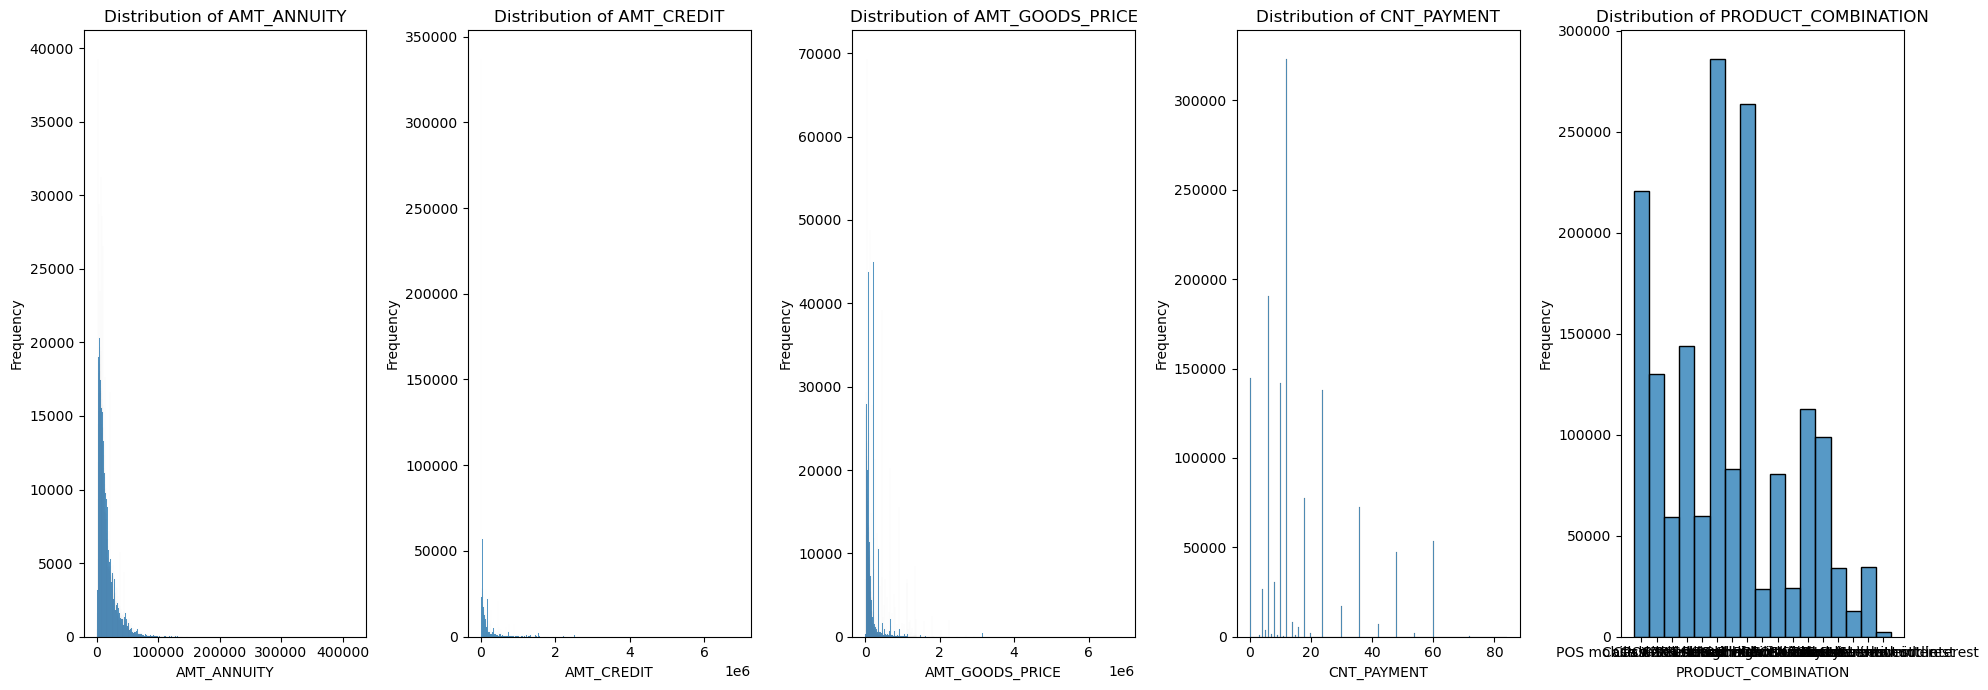

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the number of rows and columns for the subplot grid
n_cols = 5  # Number of columns in the grid
n_rows = (len(columns_to_fill) + n_cols - 1) // n_cols  # Calculate the number of rows

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 7))


# Iterate over the column names and create histograms
for i, column_name in enumerate(columns_to_fill):
    row = i // n_cols
    col = i % n_cols
    ax = axes[i]

    sns.histplot(x=column_name, data=previous_application, ax=ax)
    ax.set_xlabel(column_name)
    ax.set_ylabel('Frequency')
    ax.set_title('Distribution of {}'.format(column_name))


plt.tight_layout()
plt.show()


for numerical data if the distribution is skewed, missing values will be replaced by the median, if its normalized they will be replaced by the mean

For categorical data,missing values will be filled with the top
### 

In [29]:
median=[]
mean=[]
top=[]
for column_name in columns_to_fill:
    # Check if the column is numerical
    s = previous_application[column_name].describe()

    if previous_application[column_name].dtype in ['int64', 'float64']:
        median.append((column_name,s['50%']))
        mean.append((column_name,s['mean']))
    else:
        top.append((column_name,s['top']))  
        
    print('Description of {}'.format(column_name))
    print(s)
    print()



Description of AMT_ANNUITY
count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

Description of AMT_CREDIT
count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

Description of AMT_GOODS_PRICE
count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

Description of CNT_PAYMENT
count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

Description of PRODUCT_COMBINATION
count  

### Filling missing values

In [30]:
normaly_distributed= ['PRODUCT_COMBINATION']
for i in range(len(mean)): #mean or median same
    if mean[i][0] not in normaly_distributed: #only fill skewed columns with median
        previous_application[median[i][0]].fillna(median[i][1], inplace= True)
    else:
        previous_application[mean[i][0]].fillna(mean[i][1], inplace= True)

for i in range(len(top)):
    previous_application[top[i][0]].fillna(top[i][1], inplace= True)



In [31]:
# for days_data fill NAN with 0
days_data = list(days_data)
for col in days_data:
    previous_application[col].fillna(0, inplace=True)

In [32]:
previous_application.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
DAYS_FIRST_DRAWING             0
DAYS_FIRST_DUE                 0
DAYS_LAST_DUE_1ST_VERSION      0
DAYS_LAST_DUE                  0
DAYS_TERMI

In [33]:
numerical_columns = previous_application.select_dtypes(include=['number'])  # Select numeric columns
categorical_columns = previous_application.select_dtypes(exclude=['number'])  # Select non-numeric columns

### categorize income, credit, age, employment time, regional density

In [34]:

# creat INCOME_PERCENTILE which categorize the clients' income
application_data['INCOME_PERCENTILE'] = pd.qcut(application_data.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], 
                                              labels=['VERY_LOW', 'LOW', 'MEDIUM', 'HIGH', 'VERY_HIGH'])

# creat AMT_CREDIT_TYPE which categorize the clients' credit amount
application_data['AMT_CREDIT_AMOUNT'] = pd.qcut(application_data.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1], 
                                              labels=['VERY_LOW', 'LOW', 'MEDIUM', 'HIGH', 'VERY_HIGH']) 

# creat AMT_CREDIT_TYPE which categorize the clients' credit amount
application_data['REGION_POPULATION_RELATIVE'] = pd.qcut(application_data.REGION_POPULATION_RELATIVE, 
                            q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW_DENSITY', 'LOW_DENSITY', 
                                                'NORMAL_DENSITY', 'HIGH_DENSITY', 'VERY_HIGH_DENSITY']) 

#converting DAYS_BIRTH IN YEARS
application_data['DAYS_BIRTH']= (abs(application_data['DAYS_BIRTH'])/365).astype(int)   
application_data['AGE_GROUP']=pd.cut(application_data['DAYS_BIRTH'],                 
                         bins=[19,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age','Senior_Citizen']) 


# drop outlier
application_data['DAYS_EMPLOYED'] = np.where(application_data['DAYS_EMPLOYED'] == 365243, 0, application_data['DAYS_EMPLOYED'])


# the distribution of DAYS_EMPLOYED is skewed to the left med=-1213
application_data['DAYS_EMPLOYED'].replace(0, -1213, inplace=True)

# converting DAYS_EMPLOYED IN YEARS
application_data['DAYS_EMPLOYED'] = abs(application_data['DAYS_EMPLOYED']/365).astype(int)

#for peaple who worked less than a year
application_data['DAYS_EMPLOYED'].replace(0, 0.001, inplace=True)

application_data['PERIOD_EMPLOYED']=pd.cut(application_data['DAYS_EMPLOYED'],                 
                    bins=[0,2,6,12,50], labels=['very_recent_employee','recent_employee', 'old_employee','very_old_employee']) 


In [35]:
application_data['DAYS_EMPLOYED'].head()

0    1.000
1    3.000
2    0.001
3    8.000
4    8.000
Name: DAYS_EMPLOYED, dtype: float64

In [36]:
application_data['AMT_CREDIT_AMOUNT'].head(5)

0         LOW
1        HIGH
2    VERY_LOW
3         LOW
4         LOW
Name: AMT_CREDIT_AMOUNT, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [37]:
application_data['INCOME_PERCENTILE'].head()

0      MEDIUM
1        HIGH
2    VERY_LOW
3         LOW
4         LOW
Name: INCOME_PERCENTILE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [38]:
application_data['AGE_GROUP'].head()

0    Very_Young
1    Middle_Age
2    Middle_Age
3    Middle_Age
4    Middle_Age
Name: AGE_GROUP, dtype: category
Categories (4, object): ['Very_Young' < 'Young' < 'Middle_Age' < 'Senior_Citizen']

In [39]:
application_data['REGION_POPULATION_RELATIVE'].head()

0         LOW_DENSITY
1    VERY_LOW_DENSITY
2         LOW_DENSITY
3    VERY_LOW_DENSITY
4      NORMAL_DENSITY
Name: REGION_POPULATION_RELATIVE, dtype: category
Categories (5, object): ['VERY_LOW_DENSITY' < 'LOW_DENSITY' < 'NORMAL_DENSITY' < 'HIGH_DENSITY' < 'VERY_HIGH_DENSITY']

In [40]:
application_data['PERIOD_EMPLOYED'].head()

0    very_recent_employee
1         recent_employee
2    very_recent_employee
3            old_employee
4            old_employee
Name: PERIOD_EMPLOYED, dtype: category
Categories (4, object): ['very_recent_employee' < 'recent_employee' < 'old_employee' < 'very_old_employee']

### type adjustment

In [41]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 77 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [42]:
#convert object to category

category_columns = application_data.select_dtypes(include='object').columns

for col in category_columns:
    application_data[col] = application_data[col].astype('category')

In [43]:
# Higher annuity relative to the applied amount might indicate higher repayment obligations
#Debt-to-Income Ratio (DTI)
application_data['DTI'] = application_data['AMT_ANNUITY'] / application_data['AMT_INCOME_TOTAL']


In [44]:
# Higher annuity relative to the applied amount might indicate higher repayment obligations
#Debt-to-Income Ratio (DTI)
application_data['DTI'] = application_data['AMT_ANNUITY'] / application_data['AMT_INCOME_TOTAL']

application_data['DTI'] = pd.qcut(application_data.DTI, q=[0, 0.2, 0.5, 0.8, 0.95, 1], 
                                              labels=['VERY_LOW', 'LOW', 'MEDIUM', 'HIGH', 'VERY_HIGH'])

In [45]:
application_data['DTI'].head(30)

0          LOW
1          LOW
2     VERY_LOW
3       MEDIUM
4       MEDIUM
5         HIGH
6       MEDIUM
7          LOW
8         HIGH
9          LOW
10      MEDIUM
11        HIGH
12    VERY_LOW
13         LOW
14      MEDIUM
15         LOW
16      MEDIUM
17      MEDIUM
18    VERY_LOW
19      MEDIUM
20         LOW
21      MEDIUM
22    VERY_LOW
23        HIGH
24    VERY_LOW
25         LOW
26      MEDIUM
27      MEDIUM
28      MEDIUM
29    VERY_LOW
Name: DTI, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [46]:
application_data['DTI'].head(30)

0          LOW
1          LOW
2     VERY_LOW
3       MEDIUM
4       MEDIUM
5         HIGH
6       MEDIUM
7          LOW
8         HIGH
9          LOW
10      MEDIUM
11        HIGH
12    VERY_LOW
13         LOW
14      MEDIUM
15         LOW
16      MEDIUM
17      MEDIUM
18    VERY_LOW
19      MEDIUM
20         LOW
21      MEDIUM
22    VERY_LOW
23        HIGH
24    VERY_LOW
25         LOW
26      MEDIUM
27      MEDIUM
28      MEDIUM
29    VERY_LOW
Name: DTI, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

### Identifying irrelevant columns 

In [47]:
unrelated_cols=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

application_data.drop(labels=unrelated_cols,axis=1,inplace=True)

In [48]:
#select categorical cols
category_columns = application_data.select_dtypes(include='category').columns

# Create DataFrame app_categorical_data
app_categorical_data = application_data[category_columns]

# Create DataFrame app_numerical_data by dropping categorical columns
app_numerical_data = application_data.drop(columns=category_columns)

In [49]:

#for previous_data, drop unwanted cols 
unrelated_cols=['FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','CHANNEL_TYPE']
previous_application.drop(labels=unrelated_cols,axis=1,inplace=True)

In [50]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 27 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   SK_ID_PREV                  1670214 non-null  int64  
 1   SK_ID_CURR                  1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE          1670214 non-null  object 
 3   AMT_ANNUITY                 1670214 non-null  float64
 4   AMT_APPLICATION             1670214 non-null  float64
 5   AMT_CREDIT                  1670214 non-null  float64
 6   AMT_GOODS_PRICE             1670214 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START  1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START     1670214 non-null  int64  
 9   NAME_CASH_LOAN_PURPOSE      1670214 non-null  object 
 10  NAME_CONTRACT_STATUS        1670214 non-null  object 
 11  NAME_PAYMENT_TYPE           1670214 non-null  object 
 12  CODE_REJECT_REASON          1670214 non-null  object 
 1

In [51]:
#convert object to category

category_columns = previous_application.select_dtypes(include='object').columns

for col in category_columns:
    previous_application[col] = previous_application[col].astype('category')

## Store clean data

In [52]:
for column_name in application_data.columns:
    if application_data[column_name].dtype in ['int64','float']:
        if (application_data[column_name] < 0).any() == True:
            application_data[column_name] = application_data[column_name].abs()

for column_name in previous_application.columns:
    if previous_application[column_name].dtype in ['int64','float']:
        if (previous_application[column_name] < 0).any() == True:
            previous_application[column_name] = previous_application[column_name].abs()        

In [53]:
previous_application.to_csv('previous_application_1.csv', index=False)
application_data.to_csv('application_data_1.csv', index=False)

In [54]:
application_data.shape

(307511, 48)